In [1]:
# download on https://susanqq.github.io/UTKFace/

In [2]:
import pandas as pd

from datetime import datetime
from pathlib import Path

In [3]:
gender_mapping = {
    '0': 'M',
    '1': 'F',
}

race_mapping = {
    '0': 'White',
    '1': 'Black',
    '2': 'Asian',
    '3': 'Indian',
    '4': 'Others',
}

dataset_datetime_format = '%Y%m%d%H%M%S%f'
readable_datetime_format = "%d/%m/%y %H:%M:%S.%f"

filename_exceptions = {
    '44_1_4_20170116235150272.pg': '44_1_4_20170116235150272',
    '55_0_0_20170116232725357jpg': '55_0_0_20170116232725357'
}

In [4]:
files_with_error = []

In [5]:
def read_dataset(dataset_dir):
    current_path = Path('.')
    dataset_path = Path(dataset_dir)
    dataset = []
    for file in dataset_path.glob('**/*'):
        if not file.is_file():
            continue
        if file.name == '.DS_Store':
            continue
        if file.suffix in ['.zip','.gz', '.tar']:
            continue
        if file.name not in filename_exceptions.keys() and file.suffix not in ['.jpg','.JPG']:
            print(f'File with extension different than .jpg. Filename: {file}')
            continue
            
        if file.name in filename_exceptions.keys():
            filestem = filename_exceptions[file.name]
        else:
            filestem = file.stem.strip()
        
        try:
            raw_age, raw_gender, raw_race, raw_datetime = filestem.split('_')
            
            age = int(raw_age)
            gender = gender_mapping[raw_gender]
            race = race_mapping[raw_race]
            tmp_dt = datetime.strptime(raw_datetime, dataset_datetime_format)
            dt = tmp_dt.strftime(readable_datetime_format)
        except Exception as e:
            print(f'Error parsing data attributes. Error: {e}')
            files_with_error.append(str(file))
            continue

        data = {
            'age': age,
            'gender': gender,
            'race': race,
            'datetime': dt,
            'filepath': str(file.relative_to(current_path))
        }
        dataset.append(data)
    return dataset

In [6]:
dataset_data = read_dataset('../datasets/utkface')

Error parsing data attributes. Error: not enough values to unpack (expected 4, got 3)
Error parsing data attributes. Error: not enough values to unpack (expected 4, got 3)
Error parsing data attributes. Error: not enough values to unpack (expected 4, got 3)
Error parsing data attributes. Error: ''


In [7]:
for file_with_error in files_with_error:
    print(file_with_error)

../datasets/utkface/drive-download-20240615T030001Z-001/part1/61_3_20170109150557335.jpg
../datasets/utkface/drive-download-20240615T030001Z-001/part1/61_1_20170109142408075.jpg
../datasets/utkface/drive-download-20240615T030001Z-001/part2/39_1_20170116174525125.jpg
../datasets/utkface/drive-download-20240615T030001Z-001/part2/53__0_20170116184028385.jpg


In [8]:
df = pd.DataFrame(dataset_data)

df.head()

,age,gender,race,datetime,filepath
0,46,M,Indian,19/01/17 20:48:36.094000,../datasets/utkface/drive-download-20240615T03...
1,23,F,White,16/01/17 22:18:19.522000,../datasets/utkface/drive-download-20240615T03...
2,23,F,Indian,19/01/17 16:45:04.597000,../datasets/utkface/drive-download-20240615T03...
3,67,M,Black,20/01/17 22:33:07.141000,../datasets/utkface/drive-download-20240615T03...
4,24,M,Indian,19/01/17 16:59:35.686000,../datasets/utkface/drive-download-20240615T03...


<AxesSubplot:>

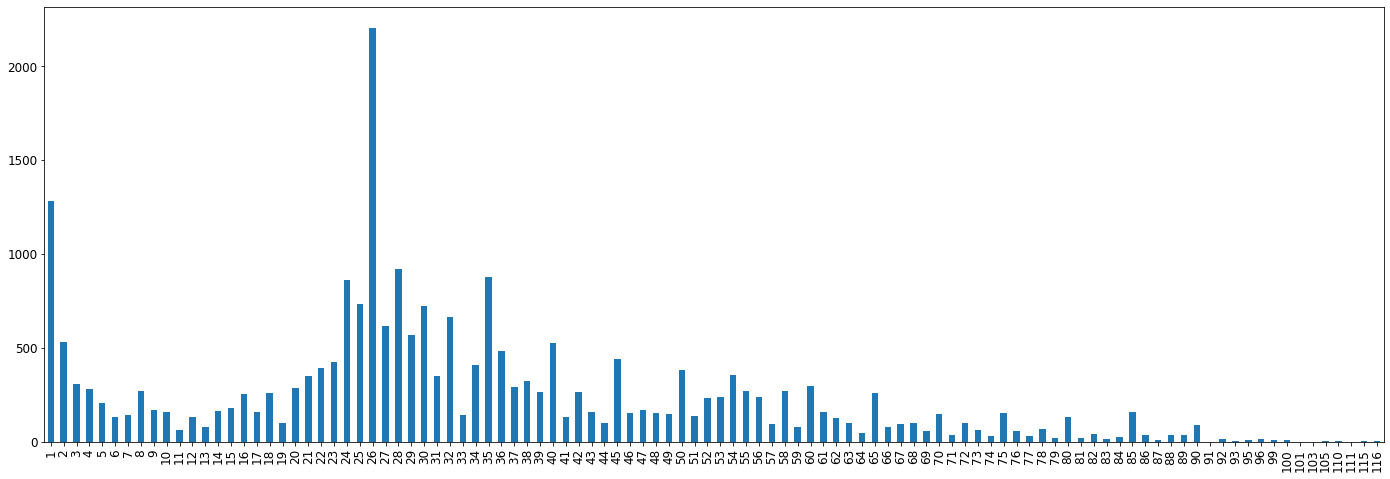

In [9]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [10]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [11]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  18.78%
